# Integrated Project 1: Video Game Study for Ice


**Intro:**

In this study we will look at a dataset from 2016 to prepare a 2017 prognosis for a company named Ice. We will determine whether or not a video game will succeed or not based off statistical and exploratory data analysis. This will allow us to spot potential big winners and help with planning advertising campaigns for Ice.

**Hypotheses:**

1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are the same.

**Desctiption of Data:**

The Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating such as Teen or Mature.

- Name

-  Platform

- Year_of_Release

- Genre

- NA_sales (North American sales in USD million)

- EU_sales (sales in Europe in USD million)

- JP_sales (sales in Japan in USD million)

- Other_sales (sales in other countries in USD million)

- Critic_Score (maximum of 100)

- User_Score (maximum of 10)

- Rating (ESRB) - E: everyone; - E10+: everyone 10+; - T: Teen; - M: Mature 17+; - A: Adults only 18+; - RT: rating pending.

Data for 2016 may be incomplete.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [2]:
# Read the csv file to create a dataframe
games_df = pd.read_csv('/datasets/games.csv')
display(games_df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
# Lowercase the column names
games_df.columns = games_df.columns.str.lower()
display(games_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Analyze the types and entries count
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Data Types Issues:

`Year of Release` should be int type. No need for float values for a year.
There are also multiple `NaN` values for the last 3 columns.

In [5]:
# Get a statistical summary of the dataset
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The data set contains almost 17k entries and 11 columns;
`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating` columns contain missing values;
`Critic_Score` data type should be changed to integer (as there is no need for floating points in this column);
`User_Score data` type should be changed from object to float;


`Year_of_Release` has a range from 1980 - 2016. The average game was released in 2006, while most of them were in 2007. Since we don't see a big enough difference between the mean and median with the standard deviation being low, it can be safely assumed the distribution of this variable is normal. 

All sales have a min of 0, we need to check and see if this is correct.They all look positively skewed distributions.We can analyze these with box plots to check for outliers.

`Critic score` has a range from 13 to 98. Since we have a mean value of 68 and a median of 71, with a std of 14, we can say this distribution is close to normal. 

## Finding and Handling Missing Values

### Names

In [6]:
games_df[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These 2 games have most of the data missing with very low sale numbers. We will delete these 2 entries from our dataset.

In [7]:
games_df = games_df.dropna(subset=['name'], axis=0)
games_df.reset_index(drop=True, inplace=True)

games_df.shape

(16713, 11)

### Year of Release

In [8]:
games_df[games_df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


We will drop the entries for `year_of_release` with `NaN` values

In [9]:
games_df = games_df.dropna(subset=['year_of_release'],axis=0)
games_df.reset_index(drop=True, inplace=True)

In [10]:
# Checking for null or NaNs after applying method
games_df['year_of_release'].isnull().sum()

0

In [11]:
# Convert the year_of_release type to int from float
games_df['year_of_release'] = np.floor(games_df['year_of_release']).astype(int)

### Scores

When looking through the dataset, we see that there some entries that have all 3 scorings missing. Those games were released on the older consoles in our dataset. We need to build an analysis for 2017 so the games from 1980s aren't going to be too meaningful. 

For the rest of the missing values we need to fill them based on the score column that is available in the dataset. We will look at the correlation between the `critic_score` and `user_score`. If that correlation is high enough, we can pick a game, and then loof for games with similar scores within a .5 range by getting an array with games that fit that criteria and take a median value for the `critic_score`.

Let's change the `user_score` data type to float.

In [12]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
games_df['rating'] = games_df['rating'].fillna('unknown')

Here we replaced the `tbd` and `nan` values with `NaN` so our conversion and correlation methods will be easier to handle. For our `rating` column we replace `NaN` with `unknown`

In [16]:
# Checking correlation between user_score and critic_score and converting types
games_df['user_score'] = games_df['user_score'].astype(float)
games_df['critic_score'] = games_df['critic_score'].astype(float)
games_df['user_score'].corr(games_df['critic_score'])

0.5796706281932222

Since this is a high correlation, we can contine with our plan to fill in the missing values in `user_score` by using the `critic_score`

In [17]:
games_df['user_score'] = games_df.groupby('critic_score')['user_score'].apply(lambda x: x.fillna(x.median()))

In [18]:
games_df['user_score'] = games_df.groupby('rating')['user_score'].apply(lambda x: x.fillna(x.median()))
games_df['critic_score'] = games_df.groupby('rating')['critic_score'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Now we will check for games that sold on different platforms. We will fill missing ratings from the platforms that have the same game with a rating value entered. 

In [19]:
games_df['user_score'] = games_df.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))
games_df['critic_score'] = games_df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))
games_df['rating'] = games_df.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()))

In [20]:
games_df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       4
user_score         4
rating             0
dtype: int64

In [21]:
games_df.loc[games_df['rating'] == 'unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.4,unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.4,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.4,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.0,7.4,unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70.0,7.4,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,70.0,7.4,unknown
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,70.0,7.4,unknown
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.0,7.4,unknown
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,70.0,7.4,unknown


In [22]:
# Check for duplicate entries
games_df.duplicated().sum()

0

In [23]:
# Data type check
games_df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Total Sales 

In [24]:
games_df['total_sales'] = games_df['na_sales'] + games_df['jp_sales'] + games_df['eu_sales'] + games_df['other_sales']
display(games_df['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: total_sales, Length: 16444, dtype: float64

## EDA
### **All platforms**

Text(0, 0.5, 'Frequency Count')

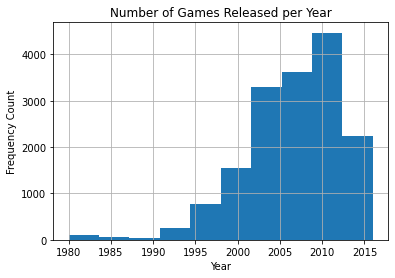

In [25]:
games_df.hist('year_of_release')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Frequency Count')

This histogram confirms what we discussed in our inital look at the dataset. Most games were released between 2009 - 2012. The number of games released before 2000 is not significant.

### **Total Sales per platform**

Text(0.5, 1.0, 'Total Sales by Platform')

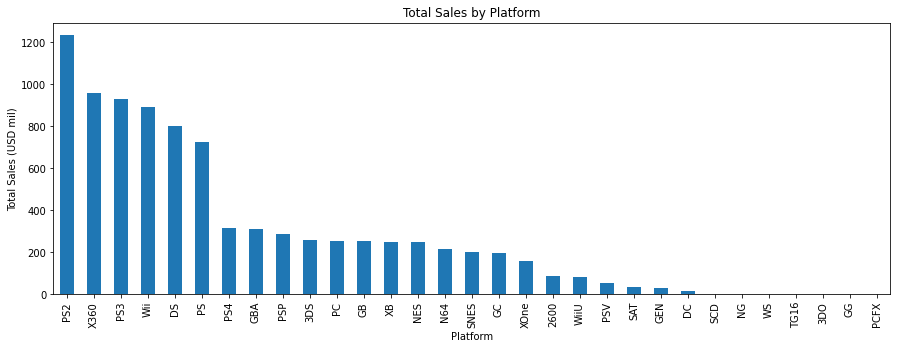

In [26]:
plt.figure(figsize=(15,5))
games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD mil)')
plt.title('Total Sales by Platform')

This bar chart shows that there is a clear top 6 platforms that sell games the most in all regions. `PS2`, `X360`, `PS3`, `Wii`, `DS`, and `PS`. We can create seperate distributions of each platform and see how many games were released each year.

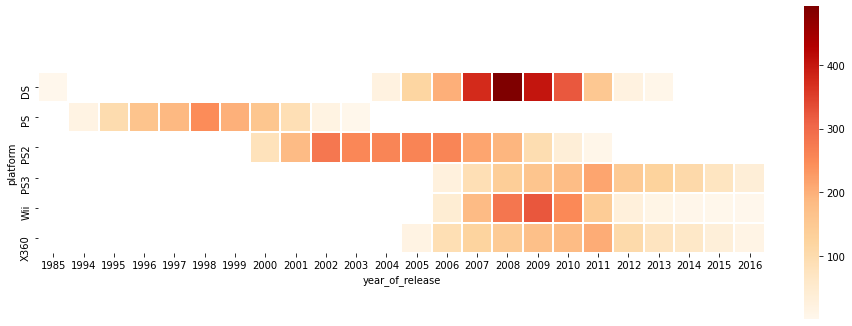

In [27]:
games_df_platform_year = games_df[games_df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].groupby(["platform","year_of_release"]).size().unstack()

plt.figure(figsize=(14,10))
g = sns.heatmap(
    games_df_platform_year, 
    square=True, 
    cbar_kws={'fraction' : 0.02}, 
    cmap='OrRd', 
    linewidth=1 
)

This heatmap shows that only 3 platforms still have sells. The `PS3`, `X360`, and `Wii`. The other 3 platform seemed to have a period of popularity but has died off by 2016. It looks like it takes around 6-10 years for a new platform to emerge. We need to determine what platforms are still popular in 2016 to conduct an analysis for 2017. From the heatmap, it seems the platforms are selling most in the middle of their lifecycle (5 years). We will take data from the past 5 years to build a prognosis for 2017. 

In [28]:
games_df_final = games_df[games_df['year_of_release'] >= 2012]
games_df_final.shape

(2886, 12)

Now that we have more recent platforms, lets take a look at the sales to help with our prognosis for 2017.

### **Most Popular Platforms Analysis**

Text(0, 0.5, 'Total Sales, (USD mil)')

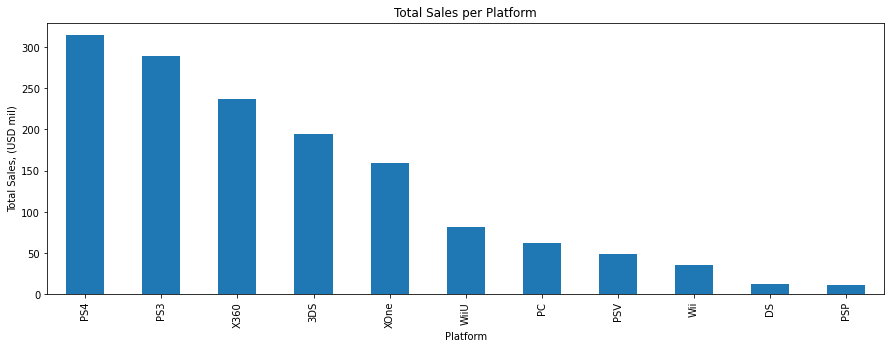

In [29]:
plt.figure(figsize=(15,5))
games_df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales, (USD mil)')

Now  we have a more accurate representation of the most popular platforms: 'PS4', 'PS3', 'X360', '3DS', 'XOne'. Let's choose them for further analysis.

We can build a box plot for the global sales of all games, by platform, in order to see if there are any differences in sales.

## Difference in sales by Platforms
### **Boxplot Comparison**

In [30]:
games_df_top_platforms = games_df[games_df['platform'].isin(['PS4','X360', 'PS3','3DS','XOne'])]

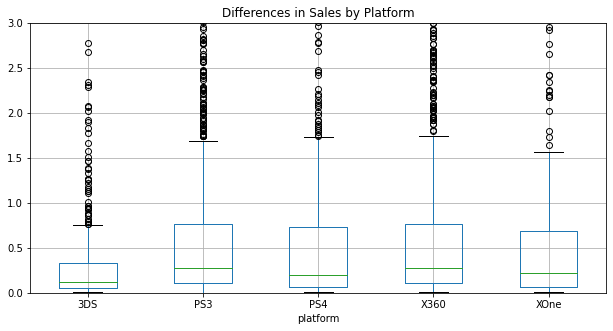

In [31]:
games_df_top_platforms.boxplot(by='platform', column='total_sales')
plt.ylim(0,3)
plt.title('Differences in Sales by Platform')
plt.suptitle('')
plt.gcf().set_size_inches(10,5)

From the boxplot, it looks as if there are no significant differences in sales between platforms. All distributions are positively skewed. Let's confirm this by looking at each platform's mean and median values.

In [32]:
games_df_top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.12,0.503535
PS3,0.28,0.713124
PS4,0.20,0.801378
X360,0.28,0.780227
XOne,0.22,0.645020


The mean and median values seem to agree with our boxplot. The mean values are higher than the median. This makes sense since our distributions are positively skewed. 

Let's see how reviews (gamer and professional) affect sales on our most popular platform: PS4.

### **Scatterplot Sales v Critic and Gamer Scores**

Text(0.5, 1.0, 'Sales vs User Score : PS4')

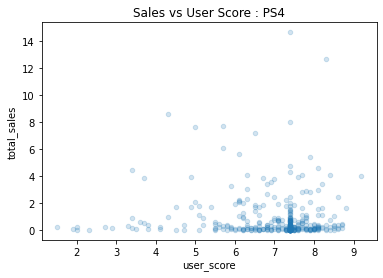

In [33]:
ps4 = games_df_final[games_df_final['platform'] == 'PS4']
ps4.plot.scatter(y='total_sales', x='user_score', alpha=.2)
plt.title('Sales vs User Score : PS4')

Text(0.5, 1.0, 'Sales vs Critic Score : PS4')

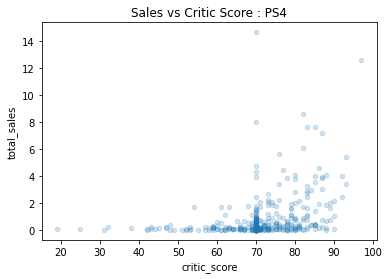

In [34]:
ps4 = games_df_final[games_df_final['platform'] == 'PS4']
ps4.plot.scatter(y='total_sales', x='critic_score', alpha=.2)
plt.title('Sales vs Critic Score : PS4')

It's hard to come to a conclusion on if the gamer and critic scores affect sales by just looking at these scatterplots. Let's use the Pearson correlation coefficient to help with a better conclusion.

In [35]:
#Correlation for User Score 
ps4['total_sales'].corr(ps4['user_score'])

-0.06470015871570226

In [36]:
#Correlation with Critic Score
ps4['total_sales'].corr(ps4['critic_score'])

0.34384095666859926

Now that we can see a better correlation via Pearson, we can see that there is almost no linear connection between sales and user scores. There is a weak positive lienar correlation between sales and critic scores however for the PS4.

### **Games Sold on Multiple Platforms**

Lets compare the top 10 games that are on the top 3 platforms

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Adventure Time: Finn & Jake Investigations'),
  Text(1, 0, 'Angry Birds Star Wars'),
  Text(2, 0, 'FIFA 14'),
  Text(3, 0, 'FIFA 15'),
  Text(4, 0, 'LEGO Jurassic World'),
  Text(5, 0, 'LEGO Marvel Super Heroes'),
  Text(6, 0, "LEGO Marvel's Avengers"),
  Text(7, 0, 'LEGO The Hobbit'),
  Text(8, 0, 'Lego Batman 3: Beyond Gotham'),
  Text(9, 0, 'Lego Star Wars: The Force Awakens')])

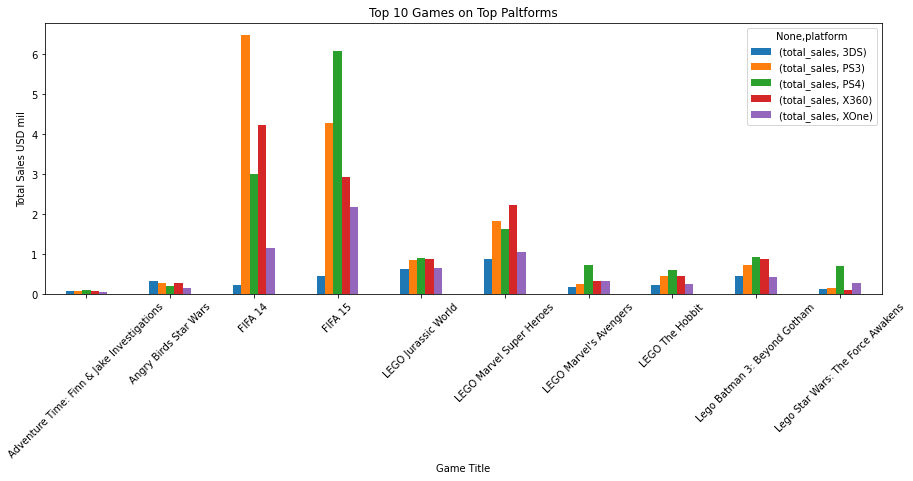

In [37]:
(games_df_top_platforms.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum')
                        .sort_values(by='total_sales', ascending=False).unstack(1).dropna()[0:10].plot(kind='bar', figsize=(15,5)))
plt.title('Top 10 Games on Top Paltforms')
plt.xlabel('Game Title')
plt.ylabel('Total Sales USD mil')
plt.xticks(rotation=45)

There is no significant difference between the amount of sales each platform made for the top ten games. 

### **Game Genre Sales**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

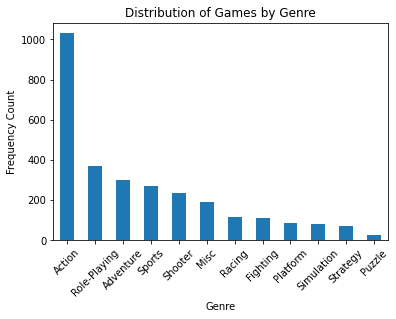

In [38]:
games_df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency Count')
plt.xticks(rotation=45)

The action genre are easily the most popular from our dataset. Let's see if they also bring in the big bucks.

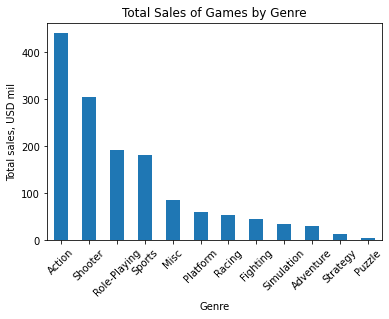

In [39]:
games_df_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales of Games by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Total sales, USD mil');

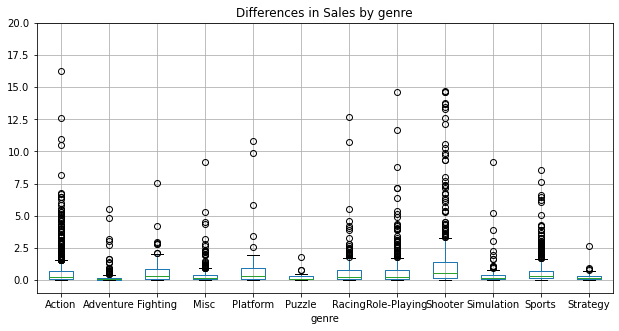

In [40]:
games_df_top_platforms.boxplot(by='genre', column='total_sales')
plt.ylim(-1,20)
plt.title('Differences in Sales by genre')
plt.suptitle('')
plt.gcf().set_size_inches(10,5)

It looks like Action games are also the most profitable. It is interesting to see the Shooter genre being second most profitable even though they are the 5th in distribution. It looks like in genreal, more active games in genres such as Action, Shooter, and Sports, tend to sell more than intellectual genres such as Strategy and Puzzle.

From our boxplot we can see that Action, Role-playing and Shooter have the highest data points, which coincide with the barchart for the 3 highest selling genres.

## Region Profiles
### **Top Platforms by Region**

In [41]:
na_top_platforms = games_df_final.pivot_table(index='platform', values='na_sales', aggfunc=['sum']).reset_index()
na_top_platforms.columns = ['platform','total_na_sales']
na_top_platforms['market_share'] = na_top_platforms['total_na_sales']/(na_top_platforms['total_na_sales']).sum()
na_top_platforms = na_top_platforms.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

others_sales = na_top_platforms.loc[5:,'total_na_sales'].sum()
others_share = na_top_platforms.loc[5:,'market_share'].sum()

na_top_platforms = na_top_platforms[0:5].append({'platform':'others', 'total_na_sales':others_sales, 'market_share':others_share}, ignore_index=True)

In [42]:
eu_top_platforms = games_df_final.pivot_table(index='platform', values='eu_sales', aggfunc=['sum']).reset_index()
eu_top_platforms.columns = ['platform','total_eu_sales']
eu_top_platforms['market_share'] = eu_top_platforms['total_eu_sales']/(eu_top_platforms['total_eu_sales']).sum()
eu_top_platforms = eu_top_platforms.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

others_sales = eu_top_platforms.loc[5:,'total_eu_sales'].sum()
others_share = eu_top_platforms.loc[5:,'market_share'].sum()

eu_top_platforms = eu_top_platforms[0:5].append({'platform':'others', 'total_eu_sales':others_sales, 'market_share':others_share}, ignore_index=True)

In [43]:

jp_top_platforms = games_df_final.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
jp_top_platforms.columns = ['platform','total_jp_sales']
jp_top_platforms['market_share'] = jp_top_platforms['total_jp_sales']/(jp_top_platforms['total_jp_sales']).sum()
jp_top_platforms = jp_top_platforms.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

others_sales = jp_top_platforms.loc[5:,'total_jp_sales'].sum()
others_share = jp_top_platforms.loc[5:,'market_share'].sum()

jp_top_platforms = jp_top_platforms[0:5].append({'platform':'others', 'total_jp_sales':others_sales, 'market_share':others_share}, ignore_index=True)

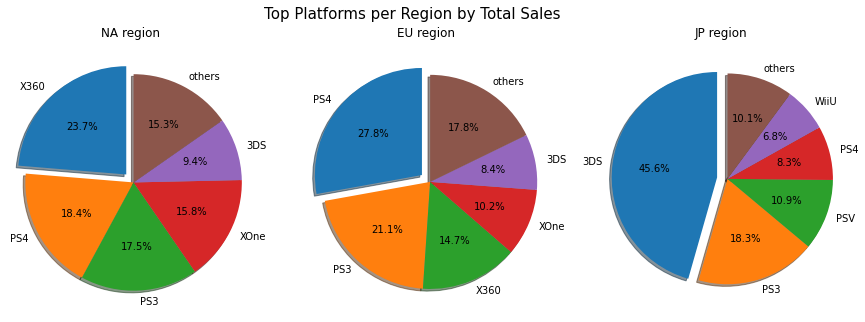

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns
fig.suptitle('Top Platforms per Region by Total Sales', fontsize=15)


labels = na_top_platforms['platform']
sizes = na_top_platforms['market_share']
explode = (0.1, 0, 0, 0, 0, 0) 

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('NA region');


labels = eu_top_platforms['platform']
sizes = eu_top_platforms['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal');  
ax2.set_title('EU region')


labels = jp_top_platforms['platform']
sizes = jp_top_platforms['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal');  
ax3.set_title('JP region');

NA region - The top sales are on the `X360` platform. 2nd is `PS4` and 3rd being `PS3`. The difference between each platform in NA are not very big but X360 seems to be the most popular in terms of sales. 

EU region - `PS4` sales the most games in this region. 2nd is `PS3` and 3rd is and combination of other platforms. 

JP region - `3DS` takes the top spot with 45.6%. 2nd is `PS3` and 3rd is `PSV`.

While both top platforms in the EU and NA region take about a quarter of total sales, the JP region's top platform takes about 45% of total sales.

### **Top Genres by Region by Sales**

In [45]:
na_top_genres = games_df_final.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()
na_top_genres.columns = ['genre','total_na_sales']
na_top_genres['market_share'] = na_top_genres['total_na_sales']/(na_top_genres['total_na_sales']).sum()
na_top_genres = na_top_genres.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

others_sales = na_top_genres.loc[5:,'total_na_sales'].sum()
others_share = na_top_genres.loc[5:,'market_share'].sum()

na_top_genres = na_top_genres[0:5].append({'genre':'others', 'total_na_sales':others_sales, 'market_share':others_share}, ignore_index=True)

eu_top_genres = games_df_final.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()
eu_top_genres.columns = ['genre','total_eu_sales']
eu_top_genres['market_share'] = eu_top_genres['total_eu_sales']/(eu_top_genres['total_eu_sales']).sum()
eu_top_genres = eu_top_genres.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

others_sales = eu_top_genres.loc[5:,'total_eu_sales'].sum()
others_share = eu_top_genres.loc[5:,'market_share'].sum()

eu_top_genres = eu_top_genres[0:5].append({'genre':'others', 'total_eu_sales':others_sales, 'market_share':others_share}, ignore_index=True)

jp_top_genres = games_df_final.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()
jp_top_genres.columns = ['genre','total_jp_sales']
jp_top_genres['market_share'] = jp_top_genres['total_jp_sales']/(jp_top_genres['total_jp_sales']).sum()
jp_top_genres = jp_top_genres.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

others_sales = jp_top_genres.loc[5:,'total_jp_sales'].sum()
others_share = jp_top_genres.loc[5:,'market_share'].sum()

jp_top_genres = jp_top_genres[0:5].append({'genre':'others', 'total_jp_sales':others_sales, 'market_share':others_share}, ignore_index=True)

/tmp/ipykernel_109/507749884.py:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


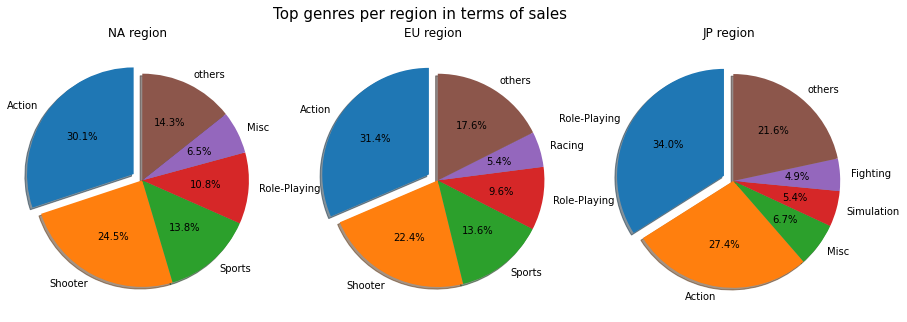

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns 

fig.suptitle('Top genres per region in terms of sales', fontsize=15)


labels = na_top_genres['genre']
sizes = na_top_genres['market_share']
explode = (0.1, 0, 0, 0, 0, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('NA region');


labels = eu_top_genres['genre']
sizes = eu_top_genres['market_share']
explode = (0.1, 0, 0, 0, 0, 0) 

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal');  
ax2.set_title('EU region')


labels = jp_top_genres['genre']
sizes = jp_top_genres['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal');  
ax3.set_title('JP region');

NA region - The top genre is Action, with Shooter being 2nd by a difference of about 6%.
EU region - The top genre here is also Action, with Shooter being 2nd by a differnce around 9%.
JP region - The top genre is Role-Playing, with Action being 2nd by a difference around 7%.

Overall action seems to be a top selling genre, which aligns with the previous analysis made.

The NA and EU region have similar percentages. Let's see which platform has the most sport games. 

In [47]:
games_df_final[games_df_final['genre'] == 'Sports'].groupby('platform')['genre'].count().sort_values(ascending=False).head()

platform
PS3     63
PS4     46
X360    44
XOne    38
PSV     21
Name: genre, dtype: int64

With `PS3` having the most sports games, it makes sense as to why NA and EU regions have them in 2nd and 3rd place. The JP region has role-playing games in 1st with more than 30% of games being role-playing. Let's see which paltform has the most role-playing games. 

In [48]:
games_df_final[games_df_final['genre'] == 'Role-Playing'].groupby('platform')['genre'].count().sort_values(ascending=False).head()

platform
PSV    84
3DS    79
PS3    61
PS4    51
PSP    29
Name: genre, dtype: int64

`PSV` and `3DS` and the top platforms with the most `Role-Playing` genre games. This aligns with both the top genres by region and most selling games by platform for the JP region. 

The other genres we placed in the `other` takes up around 20% of sales. This shows that different players like to play different genres of games.

### ESRB Ratings by Region
**Analyzing ESRB ratings vs Sales**

In [49]:
na_ratings = games_df_final.pivot_table(index='rating', values='na_sales', aggfunc=['sum']).reset_index()
na_ratings.columns = ['rating','total_na_sales']
na_ratings['market_share'] = na_ratings['total_na_sales']/(na_ratings['total_na_sales']).sum()
na_ratings = na_ratings.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

others_sales = na_ratings.loc[4:,'total_na_sales'].sum()
others_share = na_ratings.loc[4:,'market_share'].sum()

na_ratings = na_ratings[0:4].append({'rating':'others', 'total_na_sales':others_sales, 'market_share':others_share}, ignore_index=True)

eu_ratings = games_df_final.pivot_table(index='rating', values='eu_sales', aggfunc=['sum']).reset_index()
eu_ratings.columns = ['rating','total_eu_sales']
eu_ratings['market_share'] = eu_ratings['total_eu_sales']/(eu_ratings['total_eu_sales']).sum()
eu_ratings = eu_ratings.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

others_sales = eu_ratings.loc[4:,'total_eu_sales'].sum()
others_share = eu_ratings.loc[4:,'market_share'].sum()

eu_ratings = eu_ratings[0:4].append({'rating':'others', 'total_eu_sales':others_sales, 'market_share':others_share}, ignore_index=True)

jp_ratings = games_df_final.pivot_table(index='rating', values='jp_sales', aggfunc=['sum']).reset_index()
jp_ratings.columns = ['rating','total_jp_sales']
jp_ratings['market_share'] = jp_ratings['total_jp_sales']/(jp_ratings['total_jp_sales']).sum()
jp_ratings = jp_ratings.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

others_sales = jp_ratings.loc[4:,'total_jp_sales'].sum()
others_share = jp_ratings.loc[4:,'market_share'].sum()

jp_ratings = jp_ratings[0:4].append({'rating':'others', 'total_jp_sales':others_sales, 'market_share':others_share}, ignore_index=True)

/tmp/ipykernel_109/397725882.py:31: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


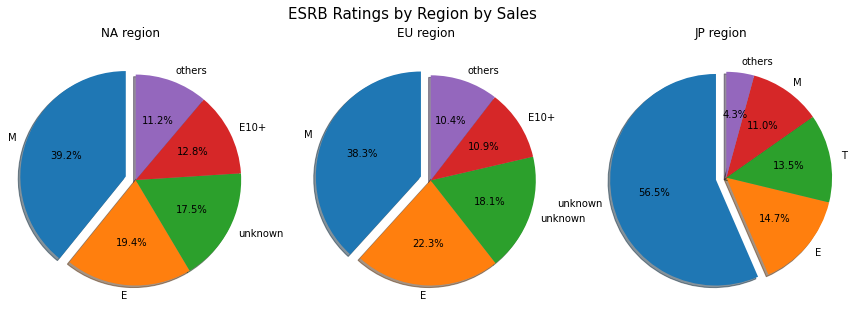

In [50]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

fig.suptitle('ESRB Ratings by Region by Sales', fontsize=15)


labels = na_ratings['rating']
sizes = na_ratings['market_share']
explode = (0.1, 0, 0, 0, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('NA region');


labels = eu_ratings['rating']
sizes = eu_ratings['market_share']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal');  
ax2.set_title('EU region')


labels = jp_ratings['rating']
sizes = jp_ratings['market_share']
explode = (0.1, 0, 0, 0, 0) 

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal'); 
ax3.set_title('JP region');

NA & EU - It appears that games with `M` rating are the most popular in these regions. Both are accounting about 47% of the gaming sales in these regions. The second most popular rating for both is `E`.  3rd is `E10`. 

JP - In this region, `E` is the top selling genre at 34%  with `T` in 2nd place at 31% and `M` is in 3rd at 25%. 

These results could reflect the target audience for each region. 

It seems that the typical user for each region are the following:

NA region: A mature person that plays mostly action games on `X360`.
EU region: A mature person that plays mostly action games on `PS4`.
JP region: A person of any age playing most role-playing games on `3DS`.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a> 
Super code and amazing visualizations</div>

## Statistical Hypothesis Testing
### Xbox One v PC Platform Average User Ratings Are The Same

H0: The means of two statistical populations are equal. This means for our study, the average user score of `Xone` and `PC` platforms are the same.

H1: The means of two statistical populations are not equal. This means the average user score of `Xone` and `PC` platforms are different.

We will set the level of significance to normal standards of 5%. If the probability of obtaining a sample mean is less than 5% and the null hypothesis is true, then we reject the value stated in the null hypothesis. 

We will use the method `scipy.stats.ttest_ind()` to test our hypothesis. This tests our hypothesis that two statistical populations are equal based on samples taken from them. 

The method will take two arrays containing our samples. The `monthly_profit` variables we calculated will be used.

We will use the `equal_var` parameter that specifies whether or not the variances of the populations should be considered equal.

In [51]:
sample_1 = games_df_final[games_df_final['platform'] == 'XOne'].dropna()['user_score']
sample_2 = games_df_final[games_df_final['platform'] == 'PC'].dropna()['user_score']

st.levene(sample_1,sample_2)

LeveneResult(statistic=8.176267961195137, pvalue=0.004423352763609519)

The p-value turns out to be very low and suggests that the variances are not equal. So we will set the `equal_var` parameter to False.

In [52]:
alpha = .05

results = st.ttest_ind(sample_1,sample_2,equal_var=False)

print('p-value: ', results.pvalue)

if(results.pvalue < alpha):
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

p-value:  0.17341555252767998
Accept Null Hypothesis


Based on our result from the test statistic we failed to reach significance. Our p-value is higher than 5%. Therefore we have to accept the null hypothesis. This means the average user ratings of the Xbox One and PC platforms are the same.

### Action and Sports Genre User Ratings Are the Same

H0: The means of two sattisitcal populations are equal. The average user score of `Action` and `Sports` genre is the same.

H1: the means of two statistical populations are not equal. The average user score of `Action` and `Sports` is different.


We will set the level of significance to normal standards of 5%. If the probability of obtaining a sample mean is less than 5% and the null hypothesis is true, then we reject the value stated in the null hypothesis.

We will use the method `scipy.stats.ttest_ind()` to test our hypothesis. This tests our hypothesis that two statistical populations are equal based on samples taken from them.

The method will take two arrays containing our samples. The `monthly_profit` variables we calculated will be used.

We will use the `equal_var` parameter that specifies whether or not the variances of the populations should be considered equal.

In [53]:
sample_3 = games_df_final[games_df_final['genre'] == 'Action'].dropna()['user_score']
sample_4 = games_df_final[games_df_final['genre'] == 'Sports'].dropna()['user_score']

st.levene(sample_3,sample_4)

LeveneResult(statistic=52.68541725839528, pvalue=6.722740028510315e-13)

The p-value turns out to be very low and suggests that the variances are not equal. So we will set the `equal_var` parameter to False.

In [54]:
alpha = .05

results = st.ttest_ind(sample_3,sample_4,equal_var=False)

print('p-value: ', results.pvalue)

if(results.pvalue < alpha):
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

p-value:  7.952689226525697e-14
Reject Null Hypothesis


Since the p-value is significantly lower than our level of significance of 5%, we have reached significance. This leads to our decision of rejecting the null hypothesis. This means that the average user ratings between `Action` and `Sports` genre are not the same. 

## Conclusion

In this study of the video game dataset, we analyzed video game player's behavior in order to identify patterns that show whether a game succeeds or fails and test two statisical hypotheses.

We first got familiar with the data and calculated some descriptive statistics. After completing that analysis, we cleaned up the data: making column names more readable, filling in missing values, appropriating data types, checked for dupes. We decided to keep some values as the way they already were because we didn't find any appropriate way to fill them all. We didn't want to incorrectly change data that could lead to false assumptions. We then finally calculated total sales for all regions.

After completing a exploratory analysis, we came to the following conclusions:

- Most games in this dataset were released between 2009-2012, but anything before 2000 is not very significant since we are creating a prognosis for 2017.

- There were 5 platforms that standout the most in terms of sales in the 3 regions: `PS4`,`PS3`,`3DS`,`X360`,`XOne`

- It takes around 6-10 years for a new platform to appear and for the older ones to fade around 5 years. We took this into consideration for our 2017 prognosis to make sure the most popular platforms were included.

- No significant difference was found in the top 5 platforms in terms of sales.

- From the scatterplots and Pearson coefficients, we saw that there was a small positive linear correlation between sales and professional critic reveiws for the `PS4`. There was no linear correlation between the sales and gamer reviews for the `PS4`.

- There was no significant difference between sales for the same game on different platforms.

- Aciton games were the most profitable and popular. In general more active games have higher sales in comparison to more intellectual games which showed very low sales.

Region Study with the Top 5 Platforms and Genres:

- NA region: The typical NA region player enjoys playing `M` rated action games on the `X360` platform. The 2nd most played ESRB rated game received `E` rating. The second most enjoyed genre in this region was `Shooter`.

- EU region: The typical EU region player enjoys playing `M` rated action games on the `PS4` platform. The 2nd most played ESRB rated games received `E` rating. The second most enjoyed genre in this region was `Shooter`.

- JP region: The typical JP region player enjoys playing `E` rated role-playing games on the `3DS` platform. The 2nd most played ESRB rated games received `T`. The second most enjoyed genre in this region was `Action`.

Statistical Hypothesis Testing:

1. Average user ratings of the `XOne` and `PC` platforms are the same.
2. Average user ratings of the `Action` and `Sports` genre are the same.

The first test we accepted the null hypothesis - the average was the same.
The second test we rejected the null hypothesis - the average was different.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a> 
Perfect conclusion with all results of analysis</div>